3. House Price Prediction
   - Goal: Predict house prices using features like area, rooms, location.
   - Dataset: California Housing.
   - Tools: Linear Regression, Pandas, Seaborn.
   - Skills: Regression, feature selection, data scaling.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# load data
california = fetch_california_housing()

# convert data
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
# exploring data

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

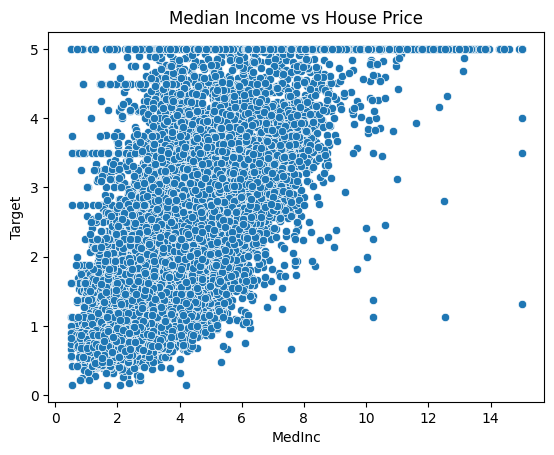

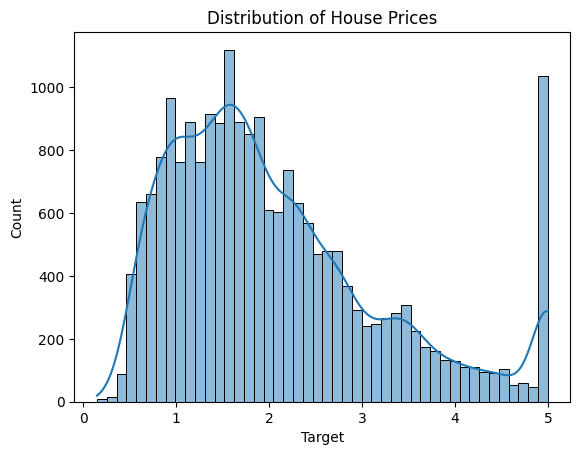

In [34]:
# Understand how features affect the target variable.

sns.scatterplot(x='MedInc', y='Target', data=df)
plt.title("Median Income vs House Price")
plt.show()

sns.histplot(df['Target'], kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [35]:
# split data into training and testing sets

X = df.drop('Target',axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
# Standardize features so they’re on the same scale (important for linear models)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
# training linear regression model

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
# Predicting and evaluate performance

y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.5558915986952444
R2 Score: 0.5757877060324508


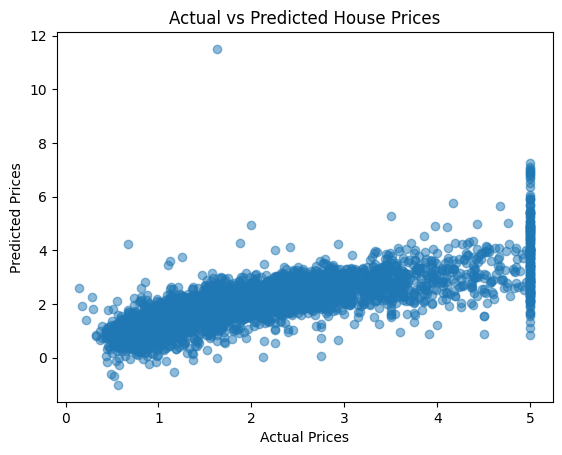

In [39]:
# Visualize prediction vs actual

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


What I learned

Linear Regression

    Used to predict continuous values (house prices).

    Learned how to train, test, and evaluate a regression model.

California Housing Dataset

    Real-world dataset with features like median income, house age, and location.

    Target variable: median house price.

Data Preprocessing

    Handled missing data (none in this dataset).

    Scaled features using StandardScaler to improve model performance.

Exploratory Data Analysis (EDA)

    Used Seaborn and Matplotlib to visualize data relationships and distributions.

    Identified important features using a correlation heatmap.

Model Evaluation

    Used Mean Squared Error (MSE) and R² Score to check model accuracy.

    Visualized predictions vs. actual values.

